This file shows how our model captures the levelt's propositions. However, at some level, the propositions could not be captured. In the second and third propositions, our model can not produce plots based on their general ideas. For example, when the strength of a side is kept low, and the strength of the other side gradually increases (from starting point with the same strength), the switch rate increases, which is inconsistent with the third proposition. 

In [1]:
import random
from scipy.stats import norm, stats
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import copy

In [2]:
# @title Plotting Functions
''''''

def plot_fish(fish_state, ax=None, show=True):
  """
  Plot the fish dynamics (states across time)
  """
  T = len(fish_state)

  offset = 3

  if not ax:
    fig, ax = plt.subplots(1, 1, figsize=(12, 3.5))

  x = np.arange(0, T, 1)
  y = offset * (fish_state*2 - 1)

  ax.plot(y, color='cornflowerblue', markersize=10, linewidth=3.0, zorder=0)
  ax.fill_between(x, y, color='cornflowerblue', alpha=.3)

  ax.set_xlabel('time')
  ax.set_ylabel('Chosen location')

  ax.set_xlim([0, T])
  ax.set_xticks([])
  ax.xaxis.set_label_coords(1.05, .54)

  ax.set_ylim([-(offset+.5), offset+.5])
  ax.set_yticks([-offset, offset])
  ax.set_yticklabels(['left', 'right'])

  ax.spines['bottom'].set_position('center')
  if show:
    plt.show()


def plot_measurement(measurement, ax=None, show=True):
  """
  Plot the measurements
  """
  T = len(measurement)

  rel_pos = 3
  red_y = []
  blue_y = []
  for idx, value in enumerate(measurement):
    if value == 0:
      blue_y.append([idx, -rel_pos])
    else:
      red_y.append([idx, rel_pos])

  red_y = np.asarray(red_y)
  blue_y = np.asarray(blue_y)

  if not ax:
    fig, ax = plt.subplots(1, 1, figsize=(12, 3.5))

  if len(red_y) > 0:
    ax.plot(red_y[:, 0], red_y[:, 1], '*', markersize=8, color='crimson')

  if len(blue_y) > 0:
    ax.plot(blue_y[:, 0], blue_y[:, 1], '*', markersize=8, color='royalblue')

  ax.set_xlabel('time', fontsize=18)
  ax.set_ylabel('Caught fish?')

  ax.set_xlim([0, T])
  ax.set_xticks([])
  ax.xaxis.set_label_coords(1.05, .54)

  ax.set_ylim([-rel_pos - .5, rel_pos + .5])
  ax.set_yticks([-rel_pos, rel_pos])
  ax.set_yticklabels(['no', 'yes!'])

  ax.spines['bottom'].set_position('center')
  if show:
    plt.show()


def plot_act_loc(loc, act, ax_loc=None, show=True):
  """
  Plot the action and location of T time points
  """
  T = len(act)

  if not ax_loc:
    fig, ax_loc = plt.subplots(1, 1, figsize=(12, 2.5))

  loc = loc*2 - 1
  act_down = []
  act_up = []
  for t in range(1, T):
    if loc[t-1] == -1 and loc[t] == 1:
      act_up.append([t - 0.5, 0])
    if loc[t-1] == 1 and loc[t] == -1:
      act_down.append([t - 0.5, 0])

  act_down = np.array(act_down)
  act_up = np.array(act_up)

  ax_loc.plot(loc, 'g.-', markersize=8, linewidth=5)

  if len(act_down) > 0:
    ax_loc.plot(act_down[:, 0], act_down[:, 1], 'rv', markersize=18, zorder=10, label='switch')

  if len(act_up) > 0:
    ax_loc.plot(act_up[:, 0], act_up[:, 1], 'r^', markersize=18, zorder=10)

  ax_loc.set_xlabel('time')
  ax_loc.set_ylabel('Your state')

  ax_loc.set_xlim([0, T])
  ax_loc.set_xticks([])
  ax_loc.xaxis.set_label_coords(1.05, .54)

  if len(act_down) > 0:
    ax_loc.legend(loc="upper right")
  elif len(act_down) == 0 and len(act_up) > 0:
    ax_loc.plot(act_up[:, 0], act_up[:, 1], 'r^', markersize=18, zorder=10, label='switch')
    ax_loc.legend(loc="upper right")

  ax_loc.set_ylim([-1.1, 1.1])
  ax_loc.set_yticks([-1, 1])

  ax_loc.tick_params(axis='both', which='major')
  ax_loc.set_yticklabels(['left', 'right'])

  ax_loc.spines['bottom'].set_position('center')

  if show:
    plt.show()


def plot_belief(belief, ax1=None, choose_policy=None, show=True):
  """
  Plot the belief dynamics of T time points
  """

  T = belief.shape[1]

  if not ax1:
      fig, ax1 = plt.subplots(1, 1, figsize=(12, 2.5))

  ax1.plot(belief[1, :], color='midnightblue', markersize=10, linewidth=3.0)

  ax1.set_xlabel('time')
  ax1.set_ylabel('Belief (right)')

  ax1.set_xlim([0, T])
  ax1.set_xticks([])
  ax1.xaxis.set_label_coords(1.05, 0.05)

  ax1.set_yticks([0, 1])
  ax1.set_ylim([0, 1.1])

  labels = [item.get_text() for item in ax1.get_yticklabels()]
  ax1.set_yticklabels(['    0', '    1'])

  """
  if choose_policy == "threshold":
    ax2 = ax1.twinx()
    ax2.plot(time_range, threshold * np.ones(time_range.shape), 'r--')
    ax2.plot(time_range, (1 - threshold) * np.ones(time_range.shape), 'c--')
    ax2.set_yticks([threshold, 1 - threshold])
    ax2.set_ylim([0, 1.1])
    ax2.tick_params(axis='both', which='major', labelsize=18)
    labels = [item.get_text() for item in ax2.get_yticklabels()]
    labels[0] = 'threshold to switch \n from left to right'
    labels[-1] = 'threshold to switch \n from right to left'
    ax2.set_yticklabels(labels)
  """
  if show:
    plt.show()


def plot_dynamics(belief, loc, act, meas, fish_state, choose_policy):
  """
  Plot the dynamics of T time points
  """
  if choose_policy == 'threshold':
    fig, [ax0, ax_bel, ax_loc, ax1] = plt.subplots(4, 1, figsize=(12, 9))
    plot_fish(fish_state, ax=ax0, show=False)
    plot_belief(belief, ax1=ax_bel, show=False)
    plot_measurement(meas, ax=ax1, show=False)
    plot_act_loc(loc, act, ax_loc=ax_loc)
  else:
    fig, [ax0, ax_bel, ax1] = plt.subplots(3, 1, figsize=(12, 7))
    plot_fish(fish_state, ax=ax0, show=False)
    plot_belief(belief, ax1=ax_bel, show=False)
    plot_measurement(meas, ax=ax1, show=False)

  plt.tight_layout()
  plt.show()


def belief_histogram(belief, bins=100):
  """
  Plot the histogram of belief states
  """
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))
  ax.hist(belief, bins)
  ax.set_xlabel('belief', fontsize=18)
  ax.set_ylabel('count', fontsize=18)
  plt.show()


def plot_value_threshold(threshold_array, value_array):
  """
  Helper function to plot the value function and threshold
  """
  yrange = np.max(value_array) - np.min(value_array)
  star_loc = np.argmax(value_array)

  fig_, ax = plt.subplots(1, 1, figsize=(8, 6))
  ax.plot(threshold_array, value_array, 'b')
  ax.vlines(threshold_array[star_loc],
            min(value_array) - yrange * .1, max(value_array),
            colors='red', ls='--')
  ax.plot(threshold_array[star_loc],
          value_array[star_loc],
          '*', color='crimson',
          markersize=20)

  ax.set_ylim([np.min(value_array) - yrange * .1,
               np.max(value_array) + yrange * .1])
  ax.set_title(f'threshold vs value with switching cost c = {cost_sw:.2f}',
               fontsize=20)
  ax.set_xlabel('threshold', fontsize=16)
  ax.set_ylabel('value', fontsize=16)
  plt.show()

In [3]:
class MDP:

    """A Markov Decision Process, defined by an initial state, transition model,
    and reward function. We also keep track of a gamma value, for use by
    algorithms. The transition model is represented somewhat differently from
    the text. Instead of P(s' | s, a) being a probability number for each
    state/state/action triplet, we instead have T(s, a) return a
    list of (p, s') pairs. We also keep track of the possible states,
    terminal states, and actions for each state. [page 646]"""

    def __init__(self, init, actlist, terminals, transitions = {}, reward = None, states=None, gamma=.9):
        if not (0 < gamma <= 1):
            raise ValueError("An MDP must have 0 < gamma <= 1")

        if states:
            self.states = states
        else:
            ## collect states from transitions table
            self.states = self.get_states_from_transitions(transitions)
            
        
        self.init = init
        
        if isinstance(actlist, list):
            ## if actlist is a list, all states have the same actions
            self.actlist = actlist
        elif isinstance(actlist, dict):
            ## if actlist is a dict, different actions for each state
            self.actlist = actlist
        
        self.terminals = terminals
        self.transitions = transitions
        if self.transitions == {}:
            print("Warning: Transition table is empty.")
        self.gamma = gamma
        if reward:
            self.reward = reward
        else:
            self.reward = {s : 0 for s in self.states}
        #self.check_consistency()

    def R(self, state):
        """Return a numeric reward for this state."""
        return self.reward[state]

    def T(self, state, action):
        """Transition model. From a state and an action, return a list
        of (probability, result-state) pairs."""
        if(self.transitions == {}):
            raise ValueError("Transition model is missing")
        else:
            return self.transitions[state][action]

    def actions(self, state):
        """Set of actions that can be performed in this state. By default, a
        fixed list of actions, except for terminal states. Override this
        method if you need to specialize by state."""
        if state in self.terminals:
            return [None]
        else:
            return self.actlist

    def get_states_from_transitions(self, transitions):
        if isinstance(transitions, dict):
            s1 = set(transitions.keys())
            s2 = set([tr[1] for actions in transitions.values() 
                              for effects in actions.values() for tr in effects])
            return s1.union(s2)
        else:
            print('Could not retrieve states from transitions')
            return None

    def check_consistency(self):
        # check that all states in transitions are valid
        assert set(self.states) == self.get_states_from_transitions(self.transitions)
        # check that init is a valid state
        assert self.init in self.states
        # check reward for each state
        #assert set(self.reward.keys()) == set(self.states)
        assert set(self.reward.keys()) == set(self.states)
        # check that all terminals are valid states
        assert all([t in self.states for t in self.terminals])
        # check that probability distributions for all actions sum to 1
        for s1, actions in self.transitions.items():
            for a in actions.keys():
                s = 0
                for o in actions[a]:
                    s += o[0]
                assert abs(s - 1) < 0.001

In [120]:
class POMDP(MDP):


    def __init__(self, actions, transitions=None, rewards=None, states=None, p_stay = 0.95, sigmaAttention = np.array([.1, .02]), gamma=0.95, x = 2, y = 2, Initial_loc = 0):
        """Initialize variables of the pomdp"""
        # States: 0: Pinwheel, 1: Bull's-eye horizontal, 2: Bull's-eye vertical
        # Actions: 0: Pinwheel Perception, 1: Bull's-eye horizontal Perception, 2: Bull's-eye vertical Perception, 3: Key Bull's-eye horizontal, 4: Key Bull's-eye vertical
        # x is number of actions, and y is number of states
        if not (0 <= gamma <= 1):
            raise ValueError('A POMDP must have 0 < gamma <= 1')
        #p_stay and sigma attention are related to updating the belief 
        self.p_stay = p_stay
        self.sigmaAttention = sigmaAttention
        self.states = states
        self.actions = actions
        self.rewards = rewards
        # self.t_prob = np.array([[self.p_stay, (1-self.p_stay)/2, (1-self.p_stay)/2],
        #                          [(1-self.p_stay)/2, self.p_stay, (1-self.p_stay)/2],
        #                            [(1-self.p_stay)/2, (1-self.p_stay)/2, self.p_stay]])
        self.t_prob = transitions
        # transition model cannot be undefined
        # transitions = p_stay
        
        #t_prob is (2,2,2) 3d matrix. First dimension determines the action choice. Second dimension determines the state which the agent was in.
        # if not isinstance(transitions, (np.ndarray, list)):
        #     self.t_prob = np.array([[[transitions, 1-transitions] for _ in range(x)] for _ in range(y)], dtype=float)
        # else:
        #     self.t_prob = transitions

        # """if not self.t_prob:
        # print('Warning: Transition model is undefined')"""

        '''# sensor model cannot be undefined
        # self.e_prob = evidences or {}
        # if not self.e_prob:
        #     print('Warning: Sensor model is undefined')'''

        self.gamma = gamma
    
        #prev_state determines the previous action
        self.prev_state = Initial_loc
        # history is a number that determines the number of same actions which are chosen consequently
        self.history = 1
        # These lists are defined to save previous variants
        self.actlist = []
        self.statelist = []
        self.belieflist = []
        self.rewardlist = [[] for i in range (y)]
        # Initial reward (It is randomy assigned)
        # The dimensions of the reward array determine from which state the agent goes to which state
        self.reward_arr = np.full((x,y),1,dtype=float)
        self.fu_reward_arr = np.full((x,y),2,dtype=float)
        self.max_fu_reward = np.full((y),2,dtype=float)
        
        self.e_prob = np.random.dirichlet(np.ones(y))
        self.belief = np.random.dirichlet(np.ones(y))
        # print(self.t_prob)
    # chooses the actions based on the maximum utility of the previous state 
    def selected_action(self, utility : list):
        # exp_utilities = np.exp(utility)
        # probabilities = exp_utilities / np.sum(exp_utilities)
        # return np.random.choice(len(utility), p=probabilities)
        act = np.argmax(utility)
        return act
    
    def outcome(self, utility):
        # outcome_0 = np.sum(utility[0]*self.t_prob[0][int(self.prev_state)])
        # outcome_1 = np.sum(utility[1]*self.t_prob[1][int(self.prev_state)])
        outcome = np.zeros(len(self.actions), dtype= float)
        for i in range(len(utility)):
            outcome[i] = np.sum(utility[i])
        return outcome
    
    # Based on the chosen action and transition probabilities, it determines which state would be the next one which the agent will be placed
    def last_state(self, action):
        return str(action)
    
    # updates the reward, it generates a (2,2) array (more explanation in reward_arr initialization)
    def reward_set (self):

        """
            rewards = (rewDom, c1, c2, alpha , expts, key_rew, fixrewardstep)
            rewards = (1,                   1,                  10,     2,      5)"""
        rewDom, rewDom2, c1 , expts, consfixed = self.rewards
        exp_decay = 10 * np.exp(-self.history/expts)
        # rewsupp = 10 * np.exp(-5/expts)
        rewsupp = 10


        if self.prev_state == '0':

            self.reward_arr[1,1] = rewsupp * rewDom2 / 10
            self.reward_arr[0,0] = exp_decay*rewDom/10
            self.reward_arr[1,0]= c1
            self.reward_arr[0,1] = c1 

        elif self.prev_state == '1':

            self.reward_arr[0,0] = rewsupp *rewDom/10
            self.reward_arr[1,1] = exp_decay* rewDom2 / 10
            self.reward_arr[1,0]= c1
            self.reward_arr[0,1] = c1 




    def belief_update(self):
        # opp_state = np.abs(1-prev_state)
        # state = int(self.prev_state)

        # evaluatuing belief_0
        # print('pp', type(self.prev_state)).
        # print(self.sigmaAttention)
        if self.prev_state == '0':

            sigma1 = self.sigmaAttention[0] 
            sigma2 = self.sigmaAttention[1]


        elif self.prev_state == '1': 

            sigma1 = self.sigmaAttention[1] 
            sigma2 = self.sigmaAttention[0]

  
        
        mu = 0
        obsVal = np.random.normal(mu, sigma1, 1)
        obsProb0 = norm.pdf(obsVal, loc=mu, scale=sigma1)

        mu = 1
        obsVal = np.random.normal(mu, sigma2, 1)
        obsProb1 = norm.pdf(obsVal, loc=mu, scale=sigma2)



        observation_array = np.concatenate((obsProb0, obsProb1))
        # print('observation_array', observation_array)
        belief_arr = np.multiply(np.matmul(np.transpose(self.t_prob), np.transpose(self.belief)), observation_array)

        self.belief = belief_arr/np.sum(belief_arr)
        self.belieflist.append(belief_arr[0])







    
    #at the end of each point, updates the variants
    def update(self, st, action):
        # for i in range(len(self.rewardlist)):
        #     self.rewardlist[i].append(self.reward_arr[self.prev_state,i])
        if st != '0':
            if self.prev_state != '0':
                self.history += 1
            else:
                self.history = 0
        else:
            if self.prev_state == '0':
                self.history += 1
            else:
                self.history = 0
                
        self.prev_state = st
        self.actlist.append(action)
        self.statelist.append(st)


        

    def remove_dominated_plans(self, input_values):
        """
        Remove dominated plans.
        This method finds all the lines contributing to the
        upper surface and removes those which don't.
        """

        values = [val for action in input_values for val in input_values[action]]
        values.sort(key=lambda x: x[0], reverse=True)

        best = [values[0]]
        y1_max = max(val[1] for val in values)
        tgt = values[0]
        prev_b = 0
        prev_ix = 0
        while tgt[1] != y1_max:
            min_b = 1
            min_ix = 0
            for i in range(prev_ix + 1, len(values)):
                if values[i][0] - tgt[0] + tgt[1] - values[i][1] != 0:
                    trans_b = (values[i][0] - tgt[0]) / (values[i][0] - tgt[0] + tgt[1] - values[i][1])
                    if 0 <= trans_b <= 1 and trans_b > prev_b and trans_b < min_b:
                        min_b = trans_b
                        min_ix = i
            prev_b = min_b
            prev_ix = min_ix
            tgt = values[min_ix]
            best.append(tgt)

        return self.generate_mapping(best, input_values)

    def remove_dominated_plans_fast(self, input_values):
        """
        Remove dominated plans using approximations.
        Resamples the upper boundary at intervals of 100 and
        finds the maximum values at these points.
        """

        values = [val for action in input_values for val in input_values[action]]
        values.sort(key=lambda x: x[0], reverse=True)

        best = []
        sr = 100
        for i in range(sr + 1):
            x = i / float(sr)
            maximum = (values[0][1] - values[0][0]) * x + values[0][0]
            tgt = values[0]
            for value in values:
                val = (value[1] - value[0]) * x + value[0]
                if val > maximum:
                    maximum = val
                    tgt = value
            
            if all(any(tgt != v) for v in best):
                best.append(np.array(tgt))

        return self.generate_mapping(best, input_values)

    def generate_mapping(self, best, input_values):
        """Generate mappings after removing dominated plans"""

        mapping = defaultdict(list)
        # print('best: ',best)
        # print('input: ',input_values)
        for value in best:
            for action in input_values:
                if any(all(value == v) for v in input_values[action]):
                    mapping[action].append(value)
        # print(mapping)
        return mapping

    def max_difference(self, U1, U2):
        """Find maximum difference between two utility mappings"""

        for k, v in U1.items():
            sum1 = 0
            for element in U1[k]:
                sum1 += sum(element)
            sum2 = 0
            for element in U2[k]:
                sum2 += sum(element)
        return abs(sum1 - sum2)
    

    def belief_generation(self):
        
        states = [i for i in self.states]
        observation = [[] for i in self.states]

        for i in states:
            if i == '0':

                sigma1 = self.sigmaAttention[0] 
                sigma2 = self.sigmaAttention[1]


            elif i == '1': 

                sigma1 = self.sigmaAttention[1] 
                sigma2 = self.sigmaAttention[0]
 
            
            mu = 0
            obsVal = np.random.normal(mu, sigma1, 1)
            obsProb0 = norm.pdf(obsVal, loc=mu, scale=sigma1)

            mu = 1
            obsVal = np.random.normal(mu, sigma2, 1)
            obsProb1 = norm.pdf(obsVal, loc=mu, scale=sigma2)


            observation_array = np.concatenate((obsProb0, obsProb1))

            observation[int(i)] = observation_array/np.sum(observation_array)

        self.e_prob = observation
    
    def future_reward(self, future_step, dic):
                
        ff = future_step

        history = self.history
        state = self.statelist[-1]

        for x in range(1,ff):
            seq_list = []
            for i in range(2**x):

                binary_number = f'{i:0{x}b}'  # Convert to binary and pad with leading zeros to ensure 10 digits
                seq_list.append(binary_number)
            # print(seq_list)
            rew = None


            for seq in seq_list:
                hist = history
                current_node = dic
                prev_state = state
                # print('hist: ', hist)
                for j in range(len(seq)):
                    current_node = current_node[seq[j]]
                    if seq[j] == str(prev_state):
                        hist += 1
                        prev_state = seq[j]
                    elif seq[j] != str(prev_state):
                        hist = 0
                        prev_state = seq[j]
                # print('Seq: ', seq)
                self.reward_generation(hist, int(prev_state))
                # rew = copy.deepcopy(self.fu_reward_arr)
                rew = copy.deepcopy(self.fu_reward_arr)
                # rew = copy.deepcopy(self.reward_arr)
                # print('Att reward: ', rew)
                current_node['r'] = rew
                # print('current_node[r]: ',current_node['r'])
                # print('DDDIIIII: ', dic)
        dic['r'] = copy.deepcopy(self.reward_arr)
        return dic


            
            
            

In [121]:
def utility_calculation(pomdp, future_step, epsilon=0.1):
    """Solving a POMDP by value iteration."""
    
    U = {'':[[0]* len(pomdp.states)]}
    count = 0
    while True:
        count += 1
        prev_U = U
        # print('iteratation: ')
        values = [val for action in U for val in U[action]]
        rewards = pomdp.reward_arr
        pomdp.belief_generation()
        # print('e_prob ', pomdp.e_prob)
        # print('val is: ',values , '\n')
        value_matxs = []

        for i in values:
            for j in values:
                value_matxs.append([i, j])
        # print('matrix is : ', value_matxs)
        U1 = defaultdict(list)
        # print('U1 defaults ', U1)
        for u in value_matxs:
            for action in pomdp.actions:
                # print(u)
                utility = np.matmul(np.matmul(pomdp.t_prob, np.multiply(pomdp.gamma, np.multiply(pomdp.e_prob, np.transpose(u)))),[[1],[1]])
                rew = np.matmul(np.multiply(np.tile([rewards[int(action)]], (2, 1)).T,pomdp.t_prob),[[1],[1]])
                u1 = np.add(utility, rew)
                # print('u: ', u,'\n')
                # print('e: ', belief,'\n')
                # print('next_step', next_step_utility,'\n')

                # print('action: ', action)
                
                # print('rew', np.transpose([rew[int(action)]]))
                # print('current:', current_utility)
                # print('t_prob', pomdp.t_prob)
                # u1 = np.matmul(pomdp.t_prob, current_utility)
                # print('reward is: ', [rewards[int(action)]],'\n')
                # print('little u1 is: ',u1 ,'\n')
                u1 = np.transpose(u1)
                U1[action].append(u1[0])
                # print('U1 all possible: ', U1,'\n')
                


        U = pomdp.remove_dominated_plans_fast(U1)
        # print('U1', U1,'\n')
        
        
        # U = U1
        # print('U final', U)
        # print(2*'\n')
        # replace with U = pomdp.remove_dominated_plans(U1) for accurate calculations

        if count > future_step:
            
            # if pomdp.max_difference(U, prev_U) < epsilon * (1 - pomdp.gamma) / pomdp.gamma:
            for act in pomdp.actions:
                if act not in U:
                    max =np.sum(pomdp.belief * U1[act][0])
                    arg = 0
                    for j in range(1, len(U1[act])):
                        # print(f'{j}: ', rewardfu[i][j])
                        # print(f'{j}*e: ',np.sum(pomdp.e_prob * rewardfu[i][j]))
                        now = np.sum(pomdp.belief * U1[act][j])
                        if now > max:
                            # print('Now')
                            max = now
                            arg = j
                    U[act] = [U1[act][arg]]
                #     U[i] = [np.array(rewards[int(i)])]
            # print('UUUUUU: ',U)

            U = [U[i] for i in pomdp.actions]
            return U

In [122]:
def test_pomdp_value_iteration(actions, rewards, transitions, states, p_stay, sigmaAttention, gamma, future_steps, iterations, switching_cost, Initial_loc,counter):


    pomdp = POMDP(actions = actions, rewards = rewards, transitions=transitions, states = states, p_stay=p_stay, sigmaAttention = sigmaAttention, gamma = gamma, Initial_loc=Initial_loc)
    utility, actlist = pomdp_value_iteration(pomdp, future_steps, iterations, switching_cost, counter = counter)
    
    return utility, actlist

In [123]:
def pomdp_value_iteration(pomdp, future_steps, iterations = 500, switching_cost = 2,  epsilon=0.1, Initial_loc=0,counter = 5000):
    """Solving a POMDP by value iteration."""

    pomdp.update(Initial_loc,Initial_loc)
    # U = {'': [[0] * len(pomdp.states)]}
    switching_cost = switching_cost
    count = 0
    future_step = future_steps
    # Variables below are used for plotting and storing times which agent spends between two switches
    c0 = 1
    c1 = 1

    prev = Initial_loc
    duration = [[] for i in range(2)]
    all_states_duration = [[] for i in range(len(pomdp.states))]
    ulist = [[] for i in range(len(pomdp.states))]
    max_count = iterations
    while True:
        count += 1
        # print('\n','\n','\n','\n','\n')
        
        # 
        #adding a cost for switching the states
        # if count%counter == 0:
        #     print(count)
        # print(count)

        rewardfu = utility_calculation(pomdp, future_step)
        
        # print('Rewardddddd. ', pomdp.reward_arr)
        # print('rewardfu: ',rewardfu)
        
        # print('HEEEEEEEEEEEREEEEEEEEEE')
        # print('\n')
        # print('rewardfu: ', rewardfu)
        # print('EEE: ', pomdp.e_prob)
        
        cost_added = np.zeros((len(pomdp.actions), len(pomdp.states)), dtype=float)
        # print('costadded: ',cost_added)
        for i in range(len(rewardfu)):
            # print('1: ', rewardfu[i][0])
            # print('1*e: ',np.sum(pomdp.e_prob * rewardfu[i][0]))
            max =np.sum(pomdp.belief * rewardfu[i][0])
            arg = 0
            for j in range(1, len(rewardfu[i])):
                # print(f'{j}: ', rewardfu[i][j])
                # print(f'{j}*e: ',np.sum(pomdp.e_prob * rewardfu[i][j]))
                now = np.sum(pomdp.belief * rewardfu[i][j])
                if now > max:
                    # print('Now')
                    max = now
                    arg = j
            cost_added[i] = rewardfu[i][arg]
        # if pomdp.statelist[-1] == 0:
        #     cost_added = rewardfu  
        # else: 
        #     cost_added = rewardfu 
            
        # print('costadded: ',cost_added)
        # print('\n')
        # print(count)
        # print('1. ', pomdp.reward_arr)
        # print('2. ' ,pomdp.fu_reward_arr)
        # print('3. ', pomdp.max_fu_reward)
        # print('cost added. ', cost_added)   
        # cost_added = pomdp.reward_arr + np.array([[0,switching_cost],[0,switching_cost]])
        # hypo_belief = pomdp.belief_generation()
        # possible_outcome = rewardfu * hypo_belief
        
        
        # print('possible outcome: ', future_outcome)
        # if pomdp.statelist[-1] == 0:
        #     # cost_added = future_outcome + pomdp.reward_arr +  np.array([[switching_cost,0],[switching_cost,0]])
        #     cost_added = future_outcome + pomdp.reward_arr
        # else: 
        #     # cost_added = future_outcome + pomdp.reward_arr +  np.array([[0,switching_cost],[0,switching_cost]])
        #     cost_added = future_outcome + pomdp.reward_arr
        
        # print('cost added: ', cost_added)
        # cost_added = rewardfu
        # print('belief ',pomdp.belief)
        U = pomdp.belief * cost_added
        # print('U: ', U)
        
        # print(possible_outcome)
        

        
        # print('e ',pomdp.belief)
        # print('r ', pomdp.reward_arr)
        # print('U ',U)
        

        # determines the more valued action for both states (for example, if the agent was in the state 0, which action would be more valued. and vice versa)
        # print(action)
        
        outcome = pomdp.outcome(U)
        # print('o: ', outcome)
        
        if prev == '0':
            outcome = outcome - np.array([0,switching_cost])
        elif prev == '1':
            outcome = outcome - np.array([switching_cost,0])

        # print('outcome: ', outcome)
        # now we select action based on the previous state,
        act = pomdp.selected_action(outcome)
        # print('action: ', act)
        state = pomdp.last_state(act)
        #storing times which agent spends between two switches

        
        if prev == state:
            if state == '0':
                c0 += 1
                # c1 = 1
            elif state == '1':
                c1 += 1
                # c0 = 1
        elif prev != state:
            if prev == '0':
                duration[0].append(c0)
                c0 = 1
            elif prev == '1':
                duration[1].append(c1)
                c1 = 1

        prev = state
        # print(prev)
        # sacing values in each time point
        ulist[0].append(outcome[0])
        ulist[1].append(outcome[1])
        # print(act)

        # choosing the next state baseed on the action and transition probabilities
        # print('\n','\n')

        # updates for the next time point 

        # print('count', count)
        # print('Rewardddddd. ', pomdp.reward_arr)
        # print('rewardfu: ',rewardfu)
        # print('belief ',pomdp.belief)
        # print('U: ', U)
        # print('o: ', outcome)
        # print('action: ', act)
        # print('state: ', state,'\n')
        
        pomdp.update(state,act)
        pomdp.belief_update()
        pomdp.reward_set()

        if count > max_count:

            if prev == '0':
                duration[0].append(c0)
            elif prev == '1':
                duration[1].append(c1)
            
            return duration, pomdp.actlist
            

In [124]:
# for i in range(1):
#     time = test_pomdp_value_iteration()

In [125]:
# tim = [[],[]]
# time = test_pomdp_value_iteration()
# tim[0].extend(time[0])
# tim[1].extend(time[1])

In [126]:
def rivalry_dynamics(rewdom,rewdom2,c1, obs_noise, p_stay, gamma, future_steps, switching_cost):
    # rewards = (rewDom, c1 , expts, consfixedd)
    rewards = (rewdom, rewdom2, c1, 5,  0)
    # def __init__(self, actions, transitions=None, evidences=None, rewards=None, states=None, gamma=0.95)
    sigmaAttention = obs_noise
    p_stay = p_stay
    gamma = gamma

    transitions = np.array([[p_stay, 1-p_stay],
                                [1-p_stay, p_stay]])
    # print('transitions', transitions)
    actions = ('0', '1')
    states = ('0', '1')
    Initial_loc = 0


    future_steps = future_steps
    iterations = 2000
    counter = 6000
    switching_cost = switching_cost
    time, actlist  = test_pomdp_value_iteration(actions, rewards, transitions, states, p_stay, sigmaAttention, gamma, future_steps, iterations, switching_cost, Initial_loc,counter)



    # side = {0: 'Left', 1: 'Right'}

    # fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # for j in range(2):
    #     data = time[j]

    #     axs[j].hist(data, bins=250, alpha=0.7, label='Histogram')

    #     mean = np.mean(data)
    #     std = np.std(data)

    #     # Add mean and standard deviation to the legend
    #     axs[j].legend([f"Mean: {mean:.2f}, SD: {std:.2f}"], loc='upper right')

    #     axs[j].set_xlabel("Time Duration")
    #     axs[j].set_ylabel("Frequency" if j == 0 else "")
    #     axs[j].set_title(f'{side[j]} Histogram')

    #     ks_statistic, p_value = stats.kstest(data, 'gamma', args=(2,))
    #     print(f"KS Test: {ks_statistic}, p-value: {p_value}")

    # plt.tight_layout()
    # plt.show()

    total_time = [sum(state_time) for state_time in time]

    total_sum = sum(total_time)
    proportions = [t / total_sum for t in total_time]

    # states = ['Left Eye', "Right Eye"]

    # plt.figure(figsize=(10, 6))
    # bars = plt.bar(states, proportions, color=['red', 'blue'])

    # for bar in bars:
    #     height = bar.get_height()
    #     plt.text(bar.get_x() + bar.get_width()/2., height,
    #             f'{height:.2%}',
    #             ha='center', va='bottom')

    # plt.title('Proportion of Time Spent in Each State')
    # plt.ylabel('Proportion of Total Time')
    # plt.ylim(0, 1) 

    # plt.grid(axis='y', linestyle='--', alpha=0.7)

    # plt.savefig('state_proportions.png')
    # plt.show()

    return proportions



In [127]:
duration = {}
predomlist = []

In [128]:
duration

{}

## Proposition 1

In [129]:
for i in range(10, 11):
    print(i)
    rewdom, rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i, 50, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1 = rivalry_dynamics(rewdom,rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration[i] = output1
    predomlist.append(output1[0])
for i in range(50, 51, 10):
    print(i)
    rewdom,rewdom2,c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,50, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1 = rivalry_dynamics(rewdom,rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration[i] = output1
    predomlist.append(output1[0])
for i in range(100, 101):
    print(i)
    rewdom,rewdom2,c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,50, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1 = rivalry_dynamics(rewdom,rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration[i] = output1
    predomlist.append(output1[0])

10
50
100


In [130]:
predomlist

[0.14442778610694654, 0.4877561219390305, 0.6496751624187906]

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15080\1302896929.py:5: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(x)


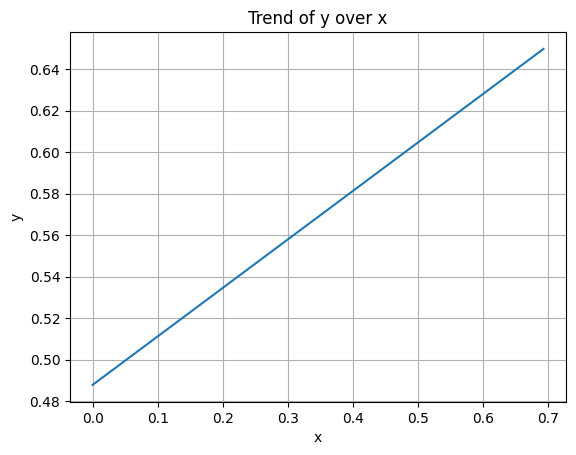

In [131]:

# Data
x = np.array([i for i in range(0,3)])
y = (np.array(predomlist))
log_y = y
log_x = np.log(x)
# Plot
plt.plot(log_x, log_y)  # line with markers at each point
plt.title("Trend of y over x")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Proposition 2

In [163]:
def rivalry_dynamics(rewdom, rewdom2, c1, obs_noise, p_stay, gamma, future_steps, switching_cost):
    # rewards = (rewDom, c1 , expts, consfixedd)
    rewards = (rewdom,rewdom2, c1, 5,  0)
    # def __init__(self, actions, transitions=None, evidences=None, rewards=None, states=None, gamma=0.95)
    sigmaAttention = obs_noise
    p_stay = p_stay
    gamma = gamma

    transitions = np.array([[p_stay, 1-p_stay],
                                [1-p_stay, p_stay]])
    # print('transitions', transitions)
    actions = ('0', '1')
    states = ('0', '1')
    Initial_loc = 0


    future_steps = future_steps
    iterations = 2500
    counter = 6000
    switching_cost = switching_cost
    time, actlist  = test_pomdp_value_iteration(actions, rewards, transitions, states, p_stay, sigmaAttention, gamma, future_steps, iterations, switching_cost, Initial_loc,counter)


    total_time = [np.mean(state_time) for state_time in time]

    # total_sum = sum(total_time)
    # proportions = [t / total_sum for t in total_time]

    return total_time



In [164]:
duration2 = {}


In [167]:
Strength = 50
meanlist = [[],[]]
x = []
for i in range(10, 201, 10):
    print(i)
    rewdom, rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,(210-i), -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1= rivalry_dynamics(rewdom,rewdom2,  c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration2[i] = output1
    # print(output1,output2)
    meanlist[0].append(output1[0])
    meanlist[1].append(output1[1])
# for i in range(50, 51, 10):
#     print(i)
#     rewdom,rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,Low, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
#     output1, _ , output2, _  = rivalry_dynamics(rewdom,rewdom2,  c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
#     duration3[i] = output1
#     print(output1,output2)
#     alternation[0].append(output1[0])
#     alternation[1].append(output1[1])
# for i in range(500, 501):
#     print(i)
#     rewdom,rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,Low, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
#     output1, _ , output2, _  = rivalry_dynamics(rewdom,rewdom2,  c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
#     duration3[i] = output1
#     print(output1,output2)
#     alternation[0].append(output1[0])
#     alternation[1].append(output1[1])

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


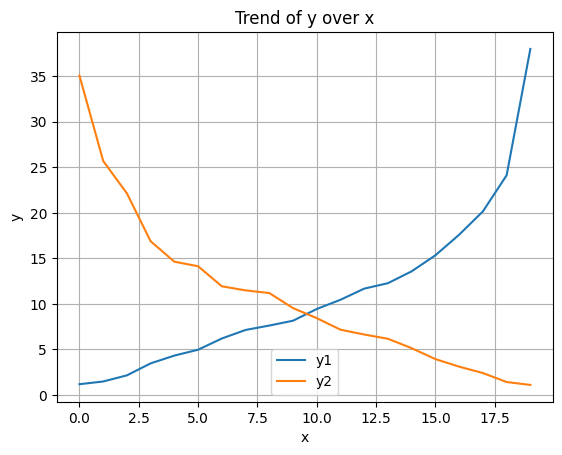

In [170]:

# Data
# x = np.log(x)
x = np.array([i for i in range(0,20)])
y1 = (np.array(meanlist[0]))
y2 = (np.array(meanlist[1]))

plt.plot(x, y1, label='y1')  # first line
plt.plot(x, y2, label='y2')  # second line
# Plot
# plt.plot(x, log_y)  # line with markers at each point
plt.title("Trend of y over x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Proposition 3

In [172]:
def rivalry_dynamics(rewdom, rewdom2, c1, obs_noise, p_stay, gamma, future_steps, switching_cost):
    # rewards = (rewDom, c1 , expts, consfixedd)
    rewards = (rewdom,rewdom2, c1, 5,  0)
    # def __init__(self, actions, transitions=None, evidences=None, rewards=None, states=None, gamma=0.95)
    sigmaAttention = obs_noise
    p_stay = p_stay
    gamma = gamma

    transitions = np.array([[p_stay, 1-p_stay],
                                [1-p_stay, p_stay]])
    # print('transitions', transitions)
    actions = ('0', '1')
    states = ('0', '1')
    Initial_loc = 0


    future_steps = future_steps
    iterations = 2500
    counter = 2500
    switching_cost = switching_cost
    time, actlist  = test_pomdp_value_iteration(actions, rewards, transitions, states, p_stay, sigmaAttention, gamma, future_steps, iterations, switching_cost, Initial_loc,counter)

    # side = {0: 'Left', 1: 'Right'}

    # fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # for j in range(2):
    #     data = time[j]

    #     axs[j].hist(data, bins=250, alpha=0.7, label='Histogram')

    #     mean = np.mean(data)
    #     std = np.std(data)

    #     # Add mean and standard deviation to the legend
    #     axs[j].legend([f"Mean: {mean:.2f}, SD: {std:.2f}"], loc='upper right')

    #     axs[j].set_xlabel("Time Duration")
    #     axs[j].set_ylabel("Frequency" if j == 0 else "")
    #     axs[j].set_title(f'{side[j]} Histogram')

        # ks_statistic, p_value = stats.kstest(data, 'gamma', args=(2,))
        # print(f"KS Test: {ks_statistic}, p-value: {p_value}")


    proportions = [np.sum(state_time) for state_time in time]
    # total_sum = sum(total_time)


    total_time = [np.size(state_time) for state_time in time]
    mean = [np.mean(state_time) for state_time in time]
    states = ['Left Eye', "Right Eye"]

    # plt.figure(figsize=(10, 6))
    # bars = plt.bar(states, proportions, color=['red', 'blue'])

    # for bar in bars:
    #     height = bar.get_height()
    #     plt.text(bar.get_x() + bar.get_width()/2., height,
    #             f'{height:.2%}',
    #             ha='center', va='bottom')

    # plt.title('Proportion of Time Spent in Each State')
    # plt.ylabel('Proportion of Total Time')
    # plt.ylim(0, 1) 

    # plt.grid(axis='y', linestyle='--', alpha=0.7)

    # plt.savefig('state_proportions.png')
    # plt.show()

    return total_time, proportions, mean, time



In [156]:
duration3 = {}


In [ ]:
Low = 10
alternation = [[],[]]
for i in range(10, 201, 10):
    print(i)
    rewdom, rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,(210-i), -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1, _ , output2, _ = rivalry_dynamics(rewdom,rewdom2,  c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration3[i] = output1
    print(output1,output2)
    alternation[0].append(output1[0])
    alternation[1].append(output1[1])


10
[60, 60] [np.float64(1.2166666666666666), np.float64(40.46666666666667)]
20
[94, 94] [np.float64(1.6808510638297873), np.float64(24.925531914893618)]
30
[120, 120] [np.float64(2.441666666666667), np.float64(18.4)]
40
[126, 126] [np.float64(3.1666666666666665), np.float64(16.682539682539684)]
50
[131, 131] [np.float64(4.519083969465649), np.float64(14.572519083969466)]
60
[132, 132] [np.float64(5.151515151515151), np.float64(13.795454545454545)]
70
[136, 136] [np.float64(5.875), np.float64(12.514705882352942)]
80
[145, 145] [np.float64(6.379310344827586), np.float64(10.86896551724138)]
90
[144, 143] [np.float64(7.520833333333333), np.float64(9.916083916083917)]
100
[138, 138] [np.float64(8.478260869565217), np.float64(9.644927536231885)]
110
[138, 138] [np.float64(9.797101449275363), np.float64(8.326086956521738)]
120
[138, 138] [np.float64(10.615942028985508), np.float64(7.507246376811594)]
130
[137, 136] [np.float64(11.13138686131387), np.float64(7.176470588235294)]
140
[138, 137] 

In [ ]:
len(alternation[0])

20

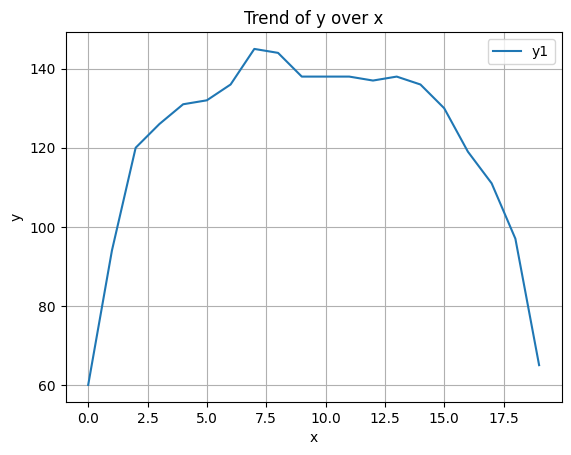

In [159]:

# Data
x = np.array([i for i in range(0,20)])
y1 = (np.array(alternation[0]))
# y2 = (np.array(alternation[1]))

plt.plot(x, y1, label='y1')  # first line
# plt.plot(x, y2, label='y2')  # second line
# Plot
# plt.plot(x, log_y)  # line with markers at each point
plt.title("Trend of y over x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Proposition 4

In [173]:
# Low = 200
alternation1 = [[],[]]
for i in range(10, 201, 10):
    print(i)
    rewdom, rewdom2, c1,  obs_noise, p_stay, gamma, future_steps, switching_cost = i,i, -3, np.array([0.02, 0.1]), 0.65, 0, 0, 3
    output1, _ , output2, _ = rivalry_dynamics(rewdom,rewdom2,  c1,  obs_noise, p_stay, gamma, future_steps, switching_cost)
    duration3[i] = output1
    print(output1,output2)
    alternation1[0].append(output1[0])
    alternation1[1].append(output1[1])



10
[59, 58] [np.float64(21.16949152542373), np.float64(21.586206896551722)]
20
[76, 76] [np.float64(16.56578947368421), np.float64(16.342105263157894)]
30
[107, 107] [np.float64(12.25233644859813), np.float64(11.121495327102803)]
40
[113, 113] [np.float64(11.787610619469026), np.float64(10.345132743362832)]
50
[126, 125] [np.float64(9.619047619047619), np.float64(10.312)]
60
[130, 129] [np.float64(9.853846153846154), np.float64(9.457364341085272)]
70
[141, 140] [np.float64(8.134751773049645), np.float64(9.67142857142857)]
80
[127, 126] [np.float64(10.165354330708661), np.float64(9.603174603174603)]
90
[136, 135] [np.float64(9.286764705882353), np.float64(9.170370370370371)]
100
[145, 145] [np.float64(8.324137931034484), np.float64(8.924137931034483)]
110
[147, 147] [np.float64(8.040816326530612), np.float64(8.97278911564626)]
120
[136, 136] [np.float64(9.441176470588236), np.float64(8.948529411764707)]
130
[141, 141] [np.float64(8.404255319148936), np.float64(9.333333333333334)]
140
[1

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15080\1816197105.py:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(np.array([i for i in range(0,20)]))


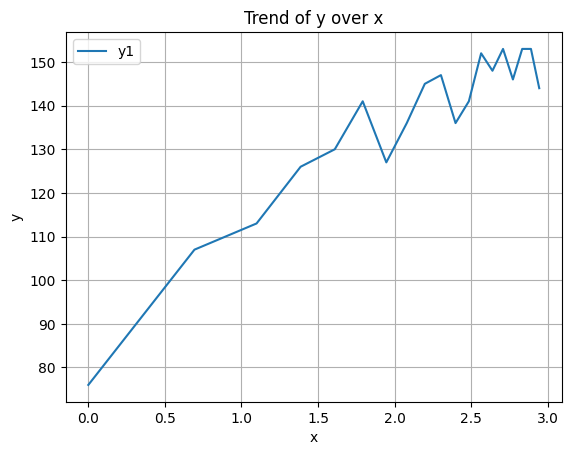

In [175]:

# Data
x = np.log(np.array([i for i in range(0,20)]))
y1 = (np.array(alternation1[0]))
# y2 = (np.array(alternation[1]))

plt.plot(x, y1, label='y1')  # first line
# plt.plot(x, y2, label='y2')  # second line
# Plot
# plt.plot(x, log_y)  # line with markers at each point
plt.title("Trend of y over x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()